In [1]:
using Revise,FileIO
y1,x1,y2,x2=load("circdata.jld2","y1","x1","y2","x2");

# Tuning Curve

┌ Info: Precompiling NeuroAnalysis [088af2c0-9cce-11e8-35da-81725c7f79e6]
└ @ Base loading.jl:1273


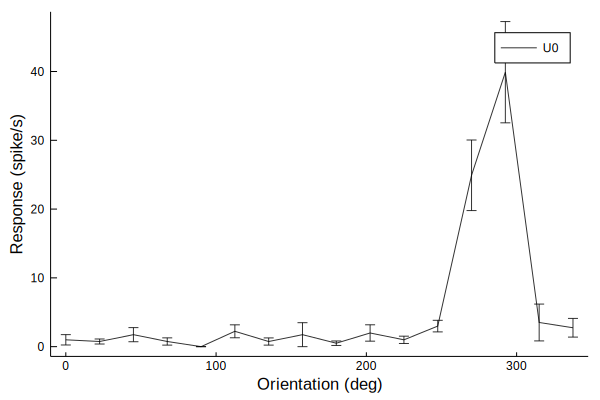

┌ Warning: C:\Users\fff00\.julia\packages\Plots\qZHsp\src\Plots.jl\ is not an existing directory, Revise is not watching
└ @ Revise C:\Users\fff00\.julia\packages\Revise\S7mrl\src\Revise.jl:489


In [2]:
using NeuroAnalysis,DataFrames
plotcondresponse(y1,DataFrame(Orientation=rad2deg.(x1)))

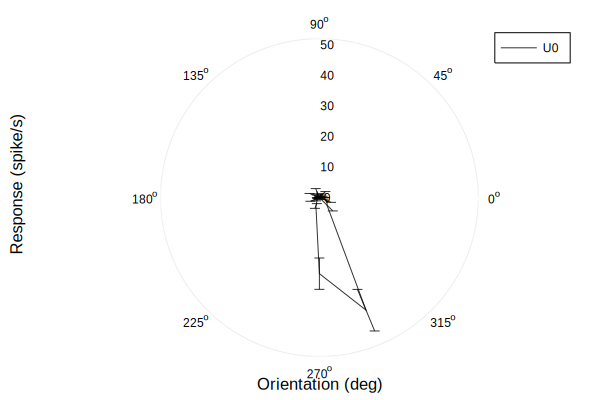

In [3]:
plotcondresponse(y1,DataFrame(Orientation=rad2deg.(x1)),projection=:polar)

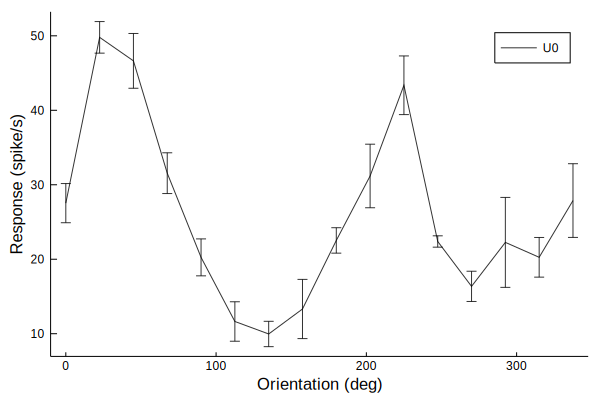

In [4]:
plotcondresponse(y2,DataFrame(Orientation=rad2deg.(x2)))

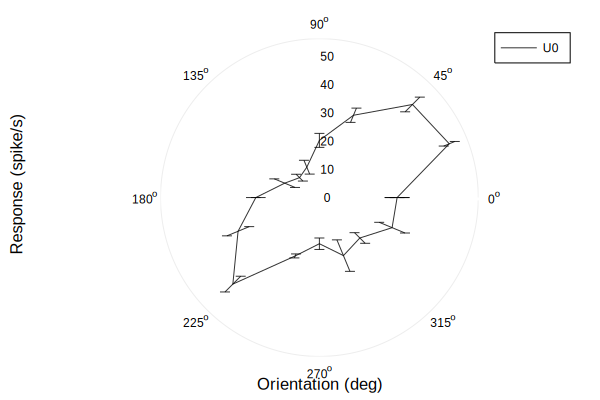

In [5]:
plotcondresponse(y2,DataFrame(Orientation=rad2deg.(x2)),projection=:polar)

# von Mises and Generalized von Mises

In [6]:
?vmf

search: vmf gvmf



`von Mises` function $f(\alpha ) =  \beta e^{\kappa (\cos (n(\alpha - \mu )) - 1)}$. (Swindale, N.V. (1998). Orientation tuning curves: empirical description and estimation of parameters. Biol Cybern 78, 45–56.)

  * β: amplitude at μ
  * μ: angle of peak
  * κ: width parameter
  * n: frequency parameter


In [7]:
?gvmf

search: gvmf



`Generalized von Mises` function $f(\alpha ) =  \beta e^{\kappa_1 (\cos (\alpha - \mu_1 ) - 1) + \kappa_2 (\cos 2(\alpha - \mu_2 ) - 1)}$. (Gatto, R., and Jammalamadaka, S.R. (2007). The generalized von Mises distribution. Statistical Methodology 4, 341–353.)


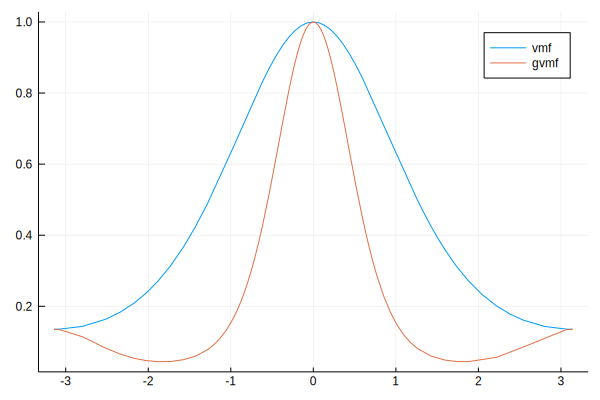

In [8]:
using Plots
plot([vmf,gvmf],-pi,pi,label=["vmf" "gvmf"])

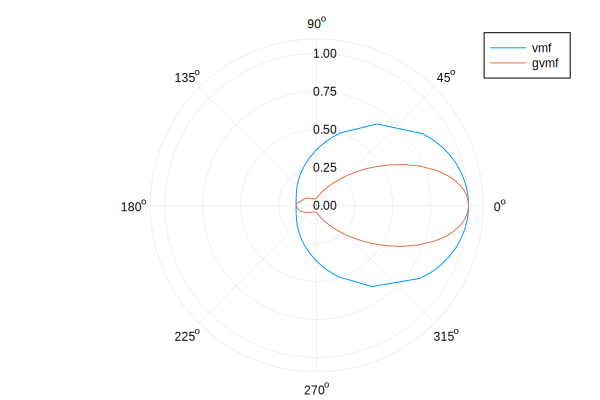

In [9]:
plot([vmf,gvmf],-pi,pi,label=["vmf" "gvmf"],projection=:polar)

## GvM Fitting

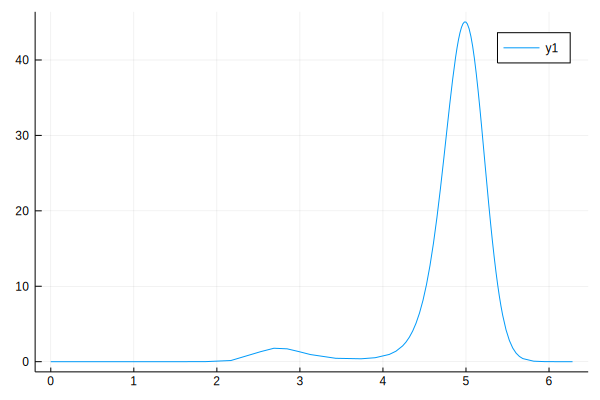

In [10]:
using LsqFit
gvmfit1 = curve_fit((x,p)->gvmf.(x,p...),x1,y1,[1.0,0,1,0,1])
plot(x->gvmf(x,gvmfit1.param...),0,2pi)

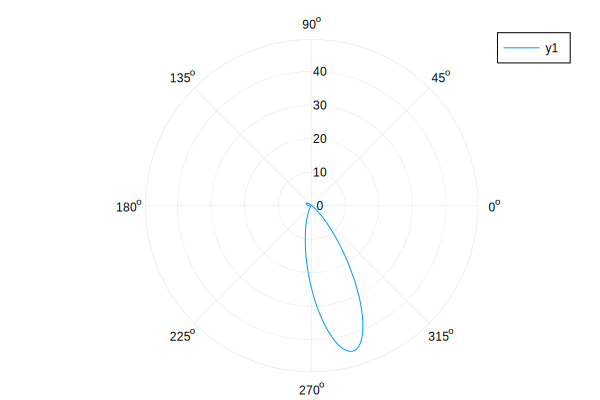

In [11]:
plot(x->gvmf(x,gvmfit1.param...),0,2pi,proj=:polar)

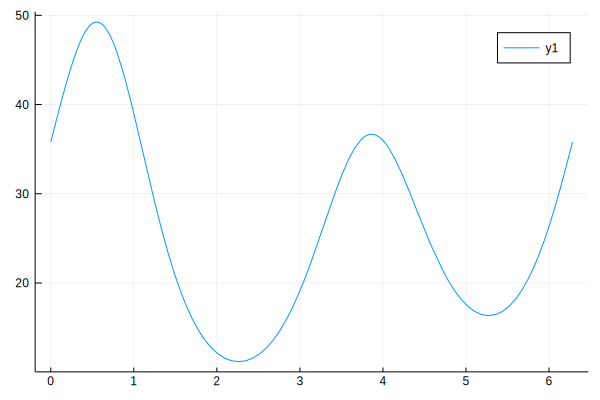

In [12]:
gvmfit2 = curve_fit((x,p)->gvmf.(x,p...),x2,y2,[1.0,0,1,0,1])
plot(x->gvmf(x,gvmfit2.param...),0,2pi)

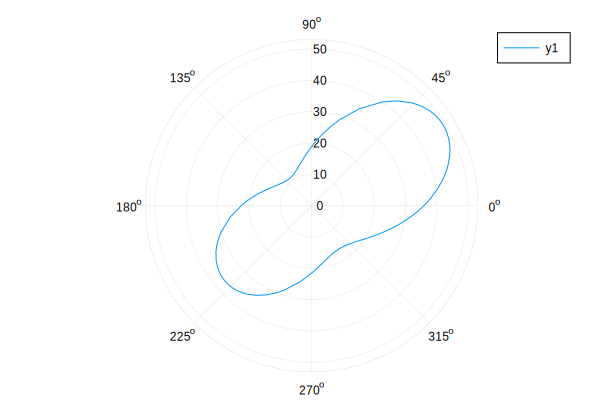

In [13]:
plot(x->gvmf(x,gvmfit2.param...),0,2pi,proj=:polar)

## vM Fitting

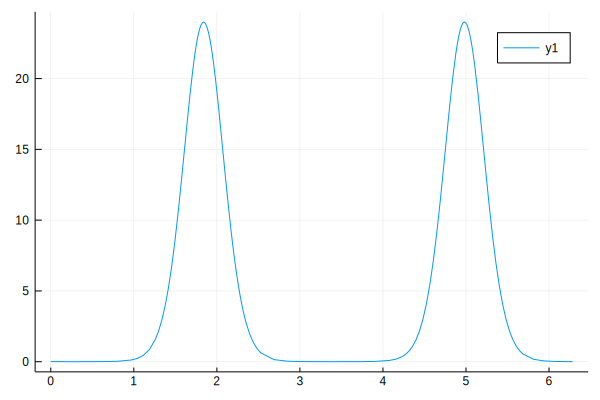

In [14]:
n=2
vmfit1 = curve_fit((x,p)->vmf.(x,p...,n=n),x1,y1,[1.0,0,1])
plot(x->vmf(x,vmfit1.param...,n=n),0,2pi)

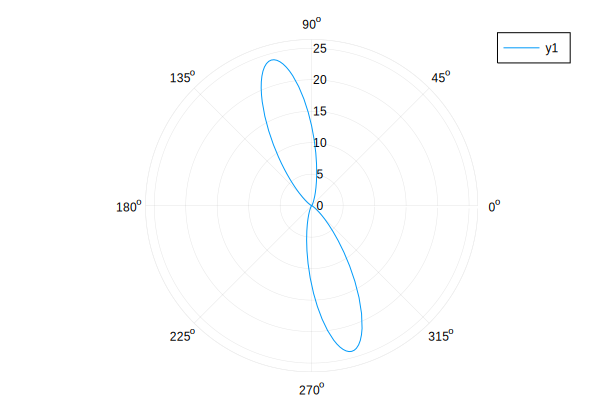

In [15]:
plot(x->vmf(x,vmfit1.param...,n=n),0,2pi,proj=:polar)

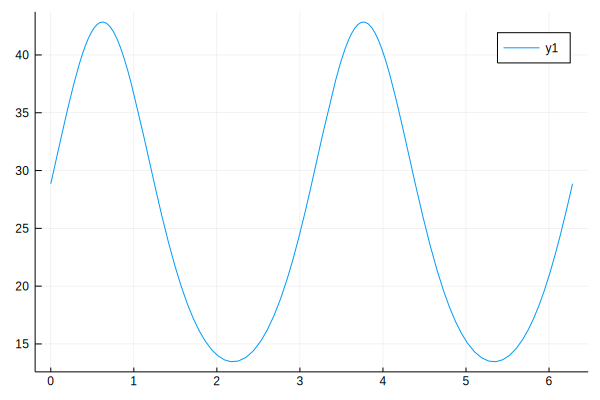

In [16]:
vmfit2 = curve_fit((x,p)->vmf.(x,p...,n=n),x2,y2,[1.0,0,1])
plot(x->vmf(x,vmfit2.param...,n=n),0,2pi)

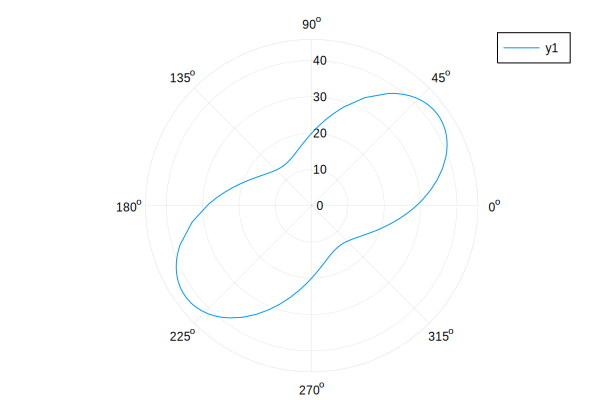

In [17]:
plot(x->vmf(x,vmfit2.param...,n=n),0,2pi,proj=:polar)

# Tuning Properties

In [18]:
s1=factorresponsestats(rad2deg.(x1),y1,factor=:Ori)

(dm = 512.5088689840542 + 130.60400932653906im, od = 14.296550148657616, dcv = 0.2307869238578677, om = -405.95497297762205 - 239.31032537384328im, oo = 105.25966794532168, ocv = 0.3012003655272202, fit = (pd = 15.813635145610723, dsi1 = 0.9999117247786887, dsi2 = 0.9998234651410312, gvm = LsqFit.LsqFitResult{Array{Float64,1},Array{Float64,1},Array{Float64,2},Array{Float64,1}}([0.5202585133636549, -0.6749329527129984, 8.016732875926413, 8.526256579687004, -4.5952018674068835], [-1.0836674227747998, -35.80376539123058, -20.909954235641646, -18.472711887914848, 9.113084910633628e-5, -1.9739976302760356, -0.7060629520467989, -5.974071711656067, 1.8136088025259893, 0.6183898144341389  …  23.95745390783732, 1.8136088025259893, 0.557003051450262, -1.9917670536706777, 0.017505290594915665, 0.9079677096689366, 6.684261157459724e-8, 9.113084910633628e-5, 0.6183898144341389, 1.2859687624623817], [1.7452241267630981 -5.683019788612318 … 8.131930466636614 -0.7042912977348809; 76.67038346915122 280

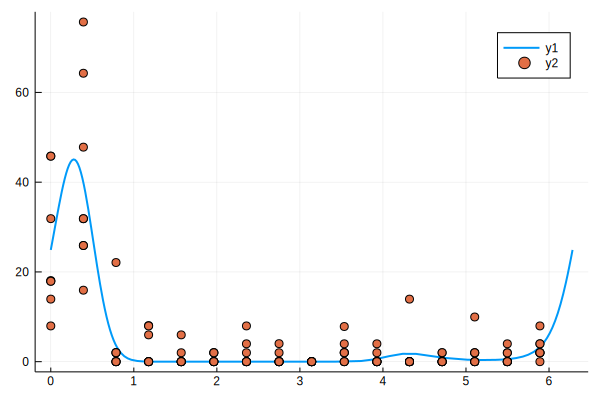

In [19]:
plot(x->gvmf(x,s1.fit.gvm.param...),0,2pi,lw=2)
scatter!(mod.(x1.+0.5pi,2pi),y1)

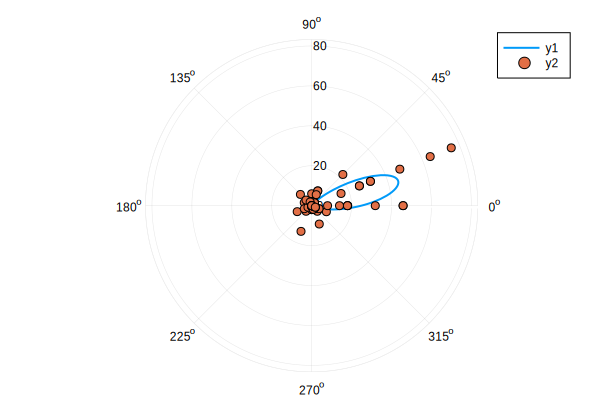

In [20]:
plot(x->gvmf(x,s1.fit.gvm.param...),0,2pi,projection=:polar,lw=2)
scatter!(x1.+0.5pi,y1)

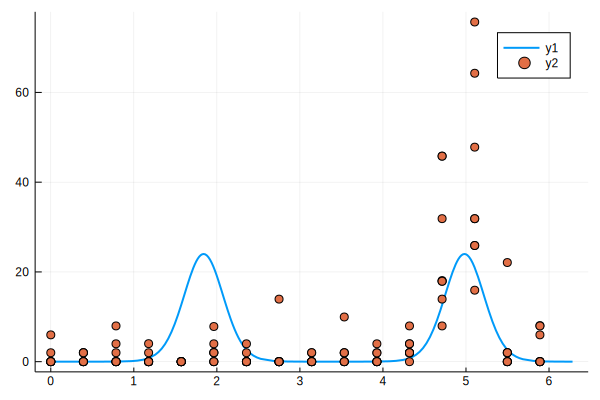

In [21]:
plot(x->vmf(x,s1.fit.vm.param...,n=2),0,2pi,lw=2)
scatter!(x1,y1)

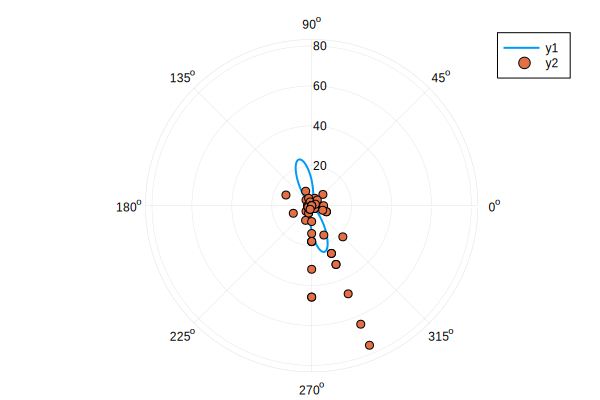

In [22]:
plot(x->vmf(x,s1.fit.vm.param...,n=2),0,2pi,projection=:polar,lw=2)
scatter!(x1,y1)

In [23]:
s2=factorresponsestats(rad2deg.(x2),y2,factor=:Ori)

(dm = -2.7425229907875632 + 285.9031937959052im, od = 90.54959222782402, dcv = 0.8802778243756425, om = 253.30608836662802 + 574.2547044994596im, oo = 33.09876444217007, ocv = 0.7320384093422965, fit = (pd = 121.69623568578686, dsi1 = 0.2774832412901812, dsi2 = 0.16109175129188225, gvm = LsqFit.LsqFitResult{Array{Float64,1},Array{Float64,1},Array{Float64,2},Array{Float64,1}}([10.673983029643004, -1.8493953068341171, -0.24085039170272132, 0.6315570554272545, -0.5665079042488261], [-22.387167246456407, -0.3725174294701894, -25.374179767160413, 0.6746346550892355, -9.90764360319088, -3.6084645230302748, -3.633950610525538, -6.290350412329804, -0.6495222707954671, 1.9525051440781098  …  5.1495315806140844, 1.9714889263142439, 6.550465871742155, -3.4793871515469483, 4.9075134695903095, -3.6273413482105212, -23.018802205071417, 7.499657418246375, -10.490735213399695, 3.331103657267528], [2.195016214320927 -0.6424730057744811 … -23.574165381677584 -12.657775378362242; 2.0178389080589905 -4.98

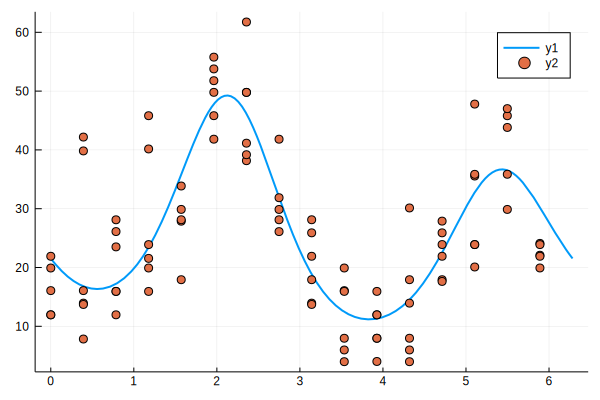

In [24]:
plot(x->gvmf(x,s2.fit.gvm.param...),0,2pi,lw=2)
scatter!(mod.(x2.+0.5pi,2pi),y2)

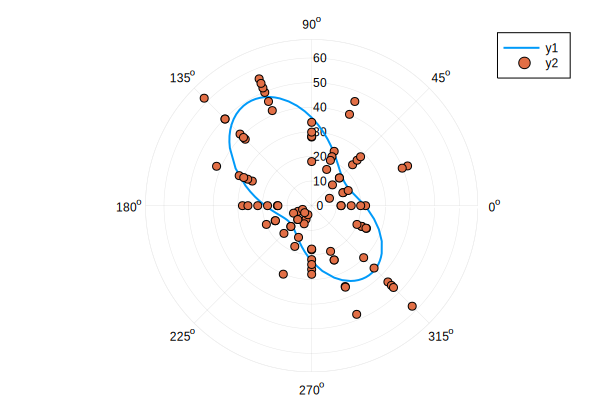

In [25]:
plot(x->gvmf(x,s2.fit.gvm.param...),0,2pi,projection=:polar,lw=2)
scatter!(x2.+0.5pi,y2)

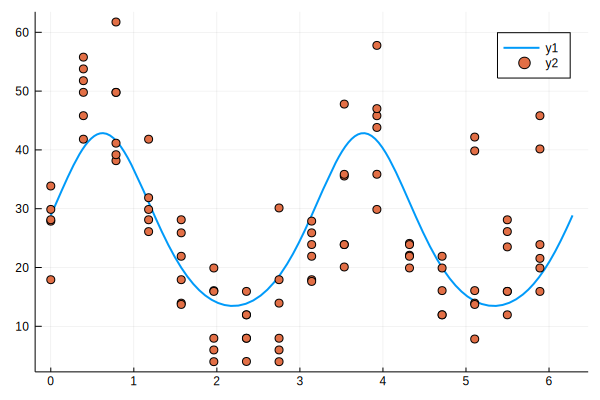

In [26]:
plot(x->vmf(x,s2.fit.vm.param...,n=2),0,2pi,lw=2)
scatter!(x2,y2)

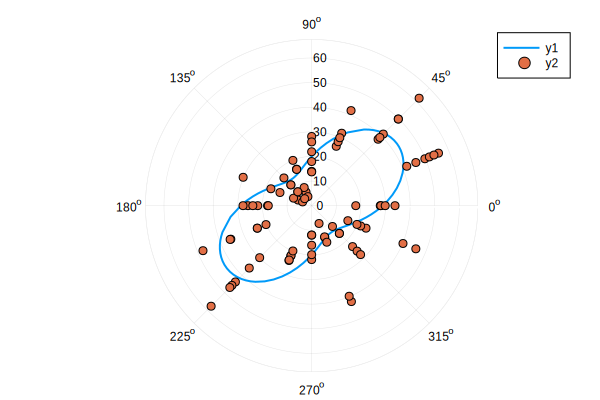

In [27]:
plot(x->vmf(x,s2.fit.vm.param...,n=2),0,2pi,projection=:polar,lw=2)
scatter!(x2,y2)